# Clustering Analysis - 3 Selected Features


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

## 1. Load and Prepare Data



In [2]:
df = pd.read_csv('Students Social Media Addiction.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (705, 13)

First few rows:


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
# Select features and display statistics
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']
X = df[selected_features].copy()

print(f"Features: {', '.join([f'{i+1}. {f}' for i, f in enumerate(selected_features)])}")
print(f"\nShape: {X.shape}\n")
print(X.describe())

Features: 1. Conflicts_Over_Social_Media, 2. Mental_Health_Score, 3. Sleep_Hours_Per_Night

Shape: (705, 3)

       Conflicts_Over_Social_Media  Mental_Health_Score  Sleep_Hours_Per_Night
count                   705.000000           705.000000             705.000000
mean                      2.849645             6.226950               6.868936
std                       0.957968             1.105055               1.126848
min                       0.000000             4.000000               3.800000
25%                       2.000000             5.000000               6.000000
50%                       3.000000             6.000000               6.900000
75%                       4.000000             7.000000               7.700000
max                       5.000000             9.000000               9.600000


### Feature Standardization

We standardize features to have $\mu = 0$ and $\sigma = 1$ using:

$$z = \frac{x - \mu}{\sigma}$$

Where:
- $x$ = original value
- $\mu$ = mean of feature
- $\sigma$ = standard deviation
- $z$ = standardized value

This ensures all features contribute equally to distance calculations.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Standardized data shape: {X_scaled.shape}")

Standardized data shape: (705, 3)


## 2. Determine Optimal K

### Elbow Method (WCSS)

$$WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

### Silhouette Score

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$

Where $a(i)$ = avg intra-cluster distance, $b(i)$ = avg nearest-cluster distance. Range: [-1, 1]

K=2: Silhouette=0.5210
K=3: Silhouette=0.4563
K=4: Silhouette=0.4142
K=5: Silhouette=0.4202
K=6: Silhouette=0.4396
K=7: Silhouette=0.4307
K=8: Silhouette=0.4415
K=9: Silhouette=0.4707
K=10: Silhouette=0.4989


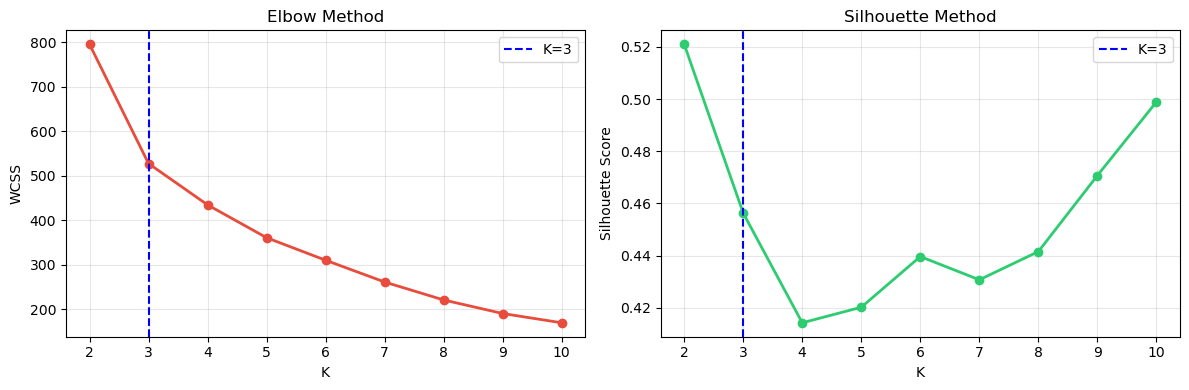

In [5]:
# Calculate metrics for K=2 to 10
K_range = range(2, 11)
inertias, silhouette_scores = [], []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    print(f"K={k}: Silhouette={silhouette_scores[-1]:.4f}")

# Plot both methods
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(K_range, inertias, 'o-', color='#e74c3c', lw=2)
axes[0].axvline(3, linestyle='--', color='blue', label='K=3')
axes[0].set(xlabel='K', ylabel='WCSS', title='Elbow Method'); axes[0].legend(); axes[0].grid(alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'o-', color='#2ecc71', lw=2)
axes[1].axvline(3, linestyle='--', color='blue', label='K=3')
axes[1].set(xlabel='K', ylabel='Silhouette Score', title='Silhouette Method'); axes[1].legend(); axes[1].grid(alpha=0.3)
plt.tight_layout(); plt.show()

## 3. K-Means Clustering (K=3)

**Calinski-Harabasz:** $CH = \frac{SS_B/(k-1)}{SS_W/(n-k)}$ (higher is better)

### Algorithm**Davies-Bouldin Index:** $DB = \frac{1}{k}\sum_{i=1}^{k} \max_{j\neq i}\left(\frac{\sigma_i + \sigma_j}{d(\mu_i, \mu_j)}\right)$ (lower is better)  

**Silhouette Score:** $s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$ where $a(i)$ = avg distance within cluster, $b(i)$ = avg distance to nearest cluster  

K-Means minimizes within-cluster variance:

### Evaluation Metrics

$$\arg\min_{C} \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

4. Repeat 2-3 until convergence

**Steps:**3. Update centroids: $\mu_i = \frac{1}{|C_i|} \sum_{x \in C_i} x$

1. Initialize $k$ centroids randomly2. Assign points to nearest centroid: $C_i = \{x: ||x - \mu_i|| \leq ||x - \mu_j||, \forall j\}$

In [6]:
# Apply KMeans with K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate metrics
kmeans_silhouette = silhouette_score(X_scaled, df['KMeans_Cluster'])
kmeans_db = davies_bouldin_score(X_scaled, df['KMeans_Cluster'])
kmeans_ch = calinski_harabasz_score(X_scaled, df['KMeans_Cluster'])

print("="*80)
print("K-MEANS CLUSTERING RESULTS")
print("="*80)
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_db:.4f}")
print(f"Calinski-Harabasz Index: {kmeans_ch:.2f}")
print(f"Inertia: {kmeans.inertia_:.4f}")
print("\nCluster distribution:")
print(df['KMeans_Cluster'].value_counts().sort_index())

K-MEANS CLUSTERING RESULTS
Number of clusters: 3
Silhouette Score: 0.4563
Davies-Bouldin Index: 0.7972
Calinski-Harabasz Index: 1055.83
Inertia: 527.6869

Cluster distribution:
KMeans_Cluster
0    194
1    272
2    239
Name: count, dtype: int64


## 4. Hierarchical Clustering

**Single:** $d(C_i, C_j) = \min_{x \in C_i, y \in C_j} ||x - y||$

### Linkage Methods

**Average:** $d(C_i, C_j) = \frac{1}{|C_i||C_j|} \sum_{x \in C_i} \sum_{y \in C_j} ||x - y||$

Distance between clusters $C_i$ and $C_j$:

**Complete:** $d(C_i, C_j) = \max_{x \in C_i, y \in C_j} ||x - y||$

**Ward:** $d(C_i, C_j) = \sum_{x \in C_i \cup C_j} ||x - \mu_{ij}||^2 - \sum_{x \in C_i} ||x - \mu_i||^2 - \sum_{x \in C_j} ||x - \mu_j||^2$

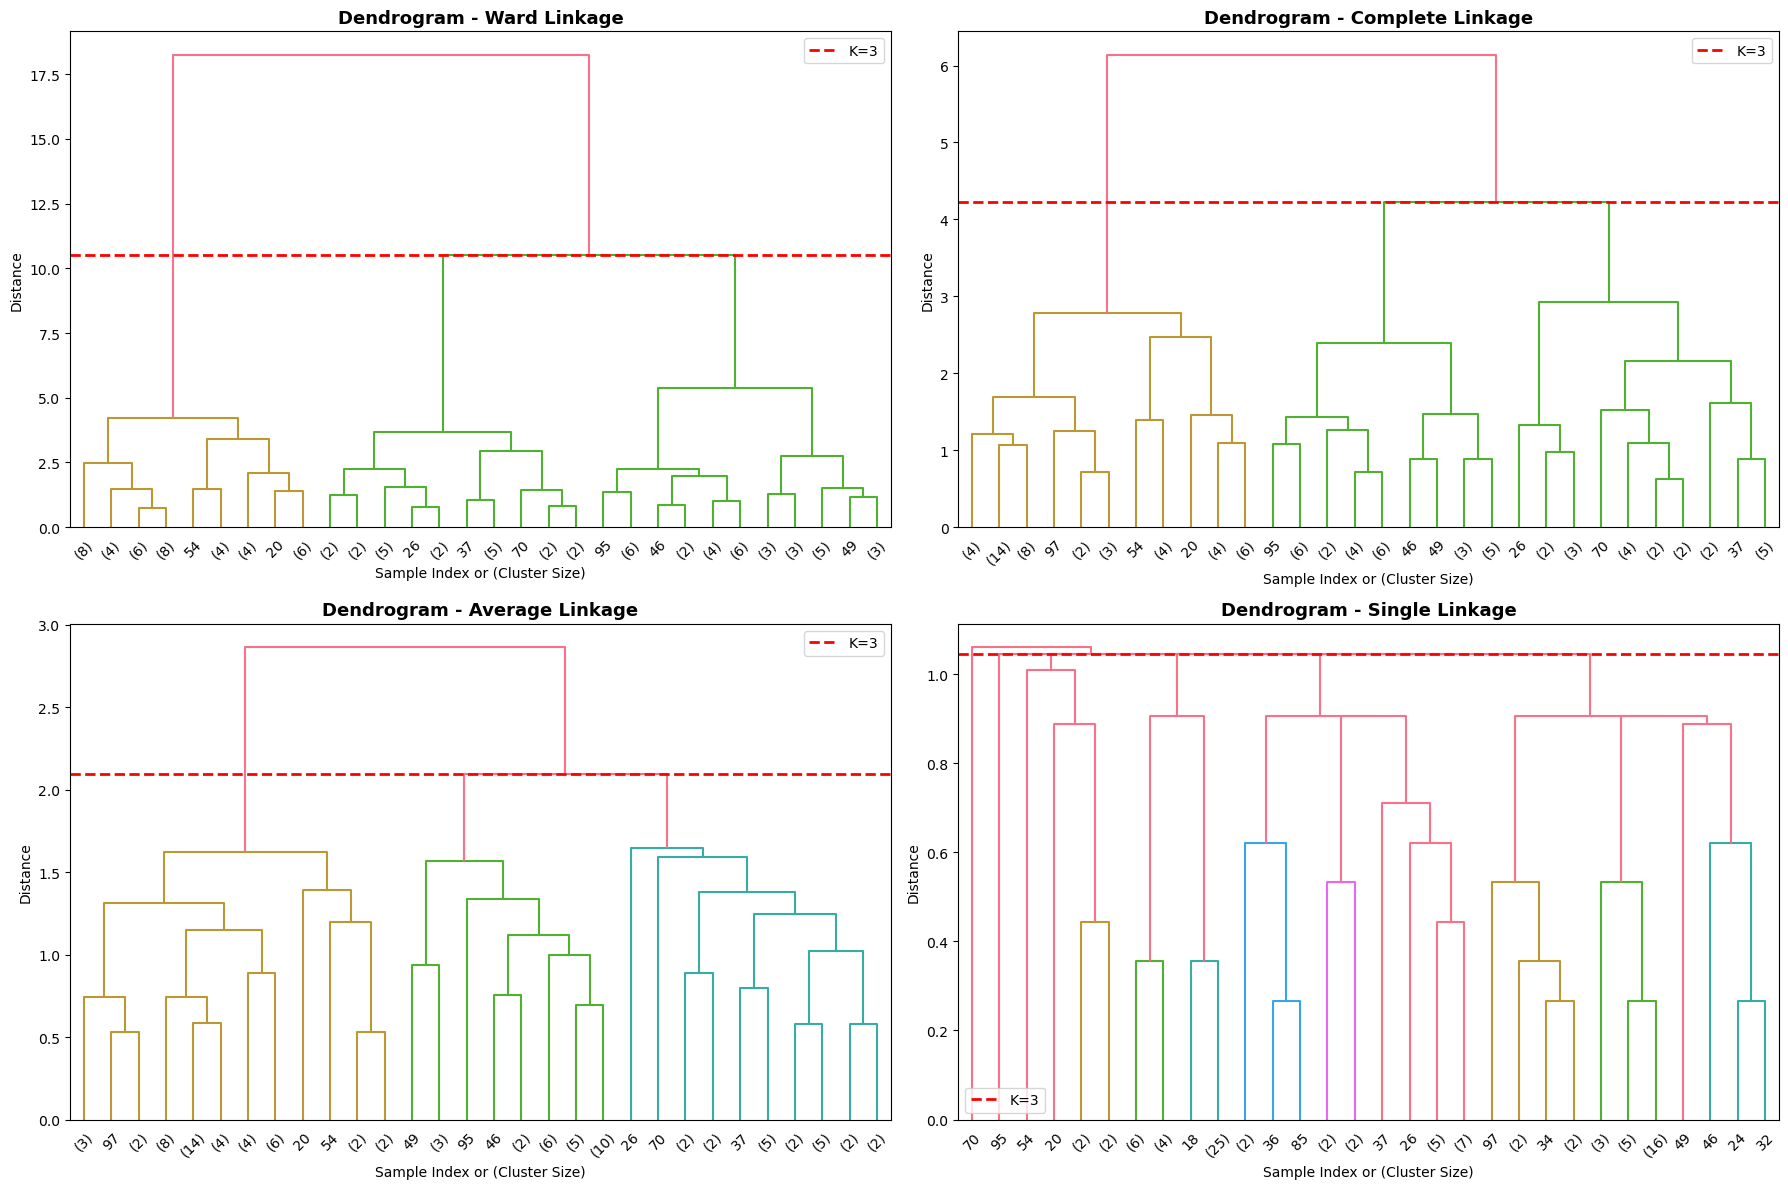

In [7]:
# Dendrogram visualization for different linkage methods
sample_size = min(100, len(X_scaled))
X_sample = X_scaled[np.random.choice(len(X_scaled), sample_size, replace=False)]
linkage_methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()
optimal_k = 3

for idx, method in enumerate(linkage_methods):
    Z = linkage(X_sample, method=method)
    dendrogram(Z, ax=axes[idx], truncate_mode='lastp', p=30)
    axes[idx].set_title(f'Dendrogram - {method.capitalize()} Linkage', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Sample Index or (Cluster Size)'); axes[idx].set_ylabel('Distance')
    axes[idx].axhline(Z[-optimal_k+1, 2], color='red', linestyle='--', lw=2, label=f'K={optimal_k}')
    axes[idx].legend()

plt.tight_layout(); plt.show()

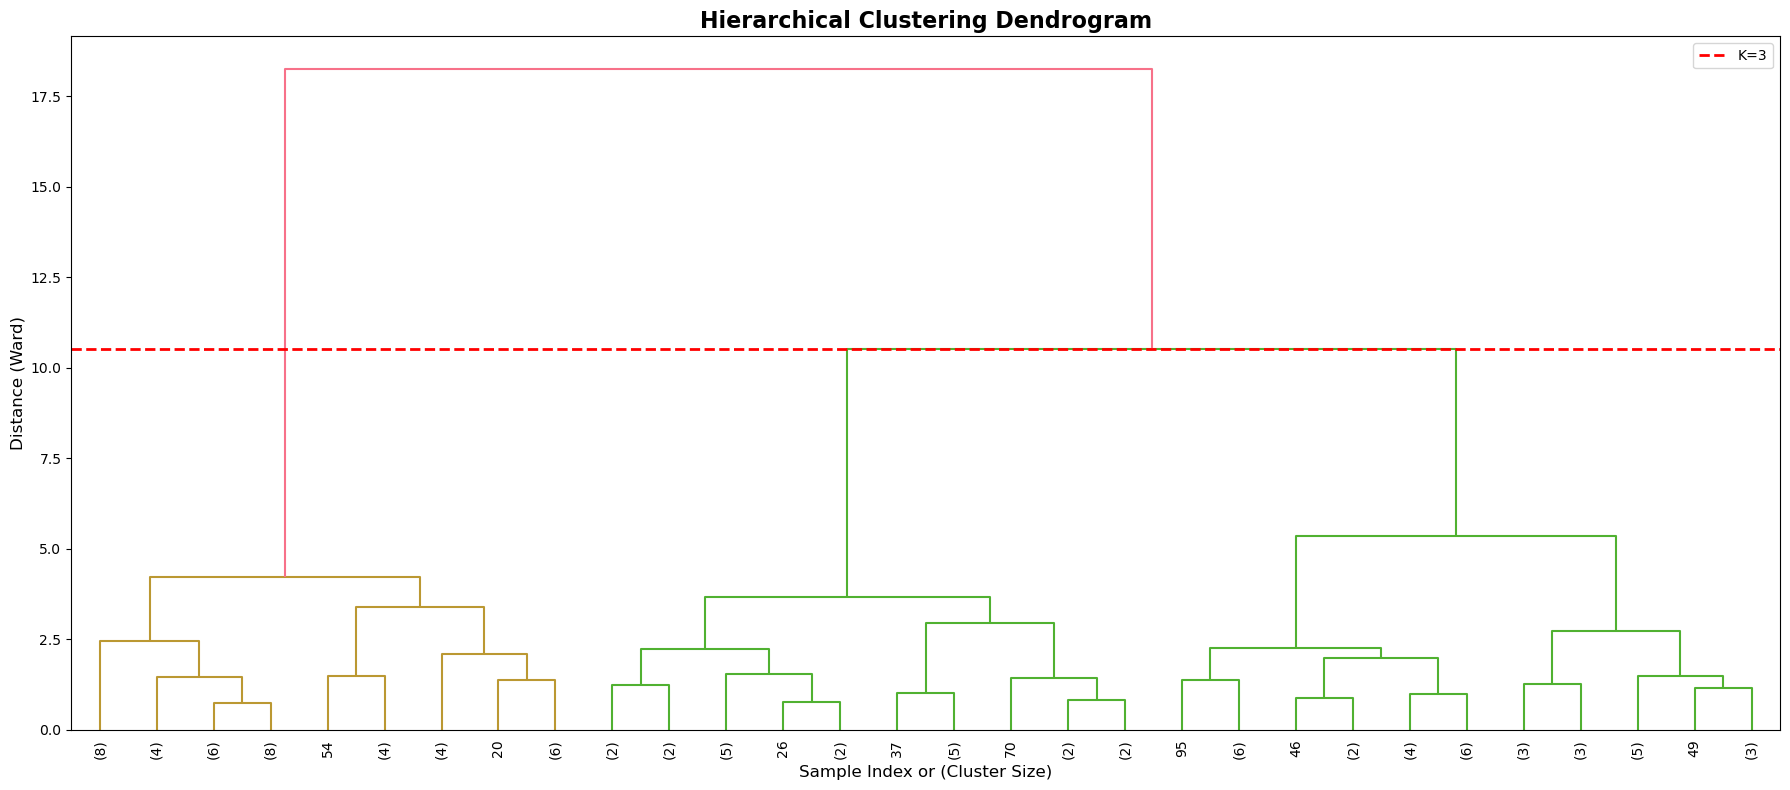

In [8]:
# Single large dendrogram with Ward linkage
Z = linkage(X_sample, method='ward')
plt.figure(figsize=(18, 8))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.axhline(Z[-optimal_k+1, 2], color='red', linestyle='--', lw=2, label=f'K={optimal_k}')
plt.title('Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.legend(); plt.tight_layout(); plt.show()

In [9]:
# Apply Hierarchical Clustering with different linkage methods
hierarchical_results = {}

for method in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage=method)
    labels = hierarchical.fit_predict(X_scaled)
    
    # Calculate metrics
    silhouette = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    
    hierarchical_results[method] = {
        'labels': labels,
        'silhouette': silhouette,
        'davies_bouldin': db,
        'calinski_harabasz': ch
    }

# Select best linkage method
best_linkage = max(hierarchical_results.items(), key=lambda x: x[1]['silhouette'])[0]
df['Hierarchical_Cluster'] = hierarchical_results[best_linkage]['labels']

# Print hierarchical clustering results
print("="*80)
print("HIERARCHICAL CLUSTERING RESULTS")
print("="*80)
print(f"\nBest linkage method: {best_linkage}")
print(f"Silhouette Score: {hierarchical_results[best_linkage]['silhouette']:.4f}")
print(f"Davies-Bouldin Index: {hierarchical_results[best_linkage]['davies_bouldin']:.4f}")
print(f"Calinski-Harabasz Index: {hierarchical_results[best_linkage]['calinski_harabasz']:.2f}")
print("\nCluster distribution:")
print(df['Hierarchical_Cluster'].value_counts().sort_index())
print("\n" + "="*80)
print("Comparison of all linkage methods:")
print("="*80)
for method, results in hierarchical_results.items():
    print(f"\n{method.capitalize()} linkage:")
    print(f"  Silhouette: {results['silhouette']:.4f}")
    print(f"  Davies-Bouldin: {results['davies_bouldin']:.4f}")
    print(f"  Calinski-Harabasz: {results['calinski_harabasz']:.2f}")

HIERARCHICAL CLUSTERING RESULTS

Best linkage method: ward
Silhouette Score: 0.4512
Davies-Bouldin Index: 0.8059
Calinski-Harabasz Index: 995.61

Cluster distribution:
Hierarchical_Cluster
0    261
1    255
2    189
Name: count, dtype: int64

Comparison of all linkage methods:

Ward linkage:
  Silhouette: 0.4512
  Davies-Bouldin: 0.8059
  Calinski-Harabasz: 995.61

Complete linkage:
  Silhouette: 0.4117
  Davies-Bouldin: 0.8485
  Calinski-Harabasz: 931.81

Average linkage:
  Silhouette: 0.4462
  Davies-Bouldin: 0.8027
  Calinski-Harabasz: 985.75

Single linkage:
  Silhouette: 0.2837
  Davies-Bouldin: 0.4637
  Calinski-Harabasz: 27.99




Compare different linkage methods to determine optimal cluster merging strategy:

- **Ward**: Minimizes within-cluster variance: $\min \sum_{i,j} \|x_i - x_j\|^2$
- **Single**: Minimum distance between clusters: $d(C_1, C_2) = \min_{x \in C_1, y \in C_2} d(x, y)$
- **Complete**: Maximum distance between clusters: $d(C_1, C_2) = \max_{x \in C_1, y \in C_2} d(x, y)$
- **Average**: Mean pairwise distance: $d(C_1, C_2) = \frac{1}{|C_1||C_2|} \sum_{x \in C_1, y \in C_2} d(x, y)$

## 5. Gaussian Mixture Model (K=5)

where $L$ = likelihood, $p$ = parameters, $n$ = samples

### Probabilistic Clustering**BIC:** $-2\ln(L) + p\ln(n)$ (lower is better)  

**AIC:** $-2\ln(L) + 2p$ (lower is better)  

GMM models data as mixture of $k$ Gaussians:**Model Selection:**  



$$p(x) = \sum_{i=1}^{k} \pi_i \mathcal{N}(x | \mu_i, \Sigma_i)$$2. **M-step:** Update $\pi_k, \mu_k, \Sigma_k$ using $\gamma_{ik}$

1. **E-step:** Compute $\gamma_{ik} = P(z_i=k|x_i) = \frac{\pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)}{\sum_j \pi_j \mathcal{N}(x_i|\mu_j, \Sigma_j)}$

Where:**EM Algorithm:**

- $\pi_i$ = mixing coefficient ($\sum \pi_i = 1$)
- $\mathcal{N}(x | \mu_i, \Sigma_i)$ = Gaussian with mean $\mu_i$ and covariance $\Sigma_i$

In [10]:
# print("="*80)
# print("GMM: OPTIMAL K SELECTION USING BIC AND AIC")
# print("="*80)

# # Range of components
# K_range_gmm = range(1, 11)
# covariance_types = ['full', 'tied', 'diag', 'spherical']

# aic_scores = {cov: [] for cov in covariance_types}
# bic_scores = {cov: [] for cov in covariance_types}
# silhouette_scores_gmm = {cov: [] for cov in covariance_types}

# # Compute AIC, BIC, and Silhouette for all covariance types
# for cov_type in covariance_types:
#     for k in K_range_gmm:
#         gmm = GaussianMixture(
#             n_components=k,
#             # covariance_type=cov_type,
#             random_state=42,
#             n_init=10
#         )
#         gmm.fit(X_scaled)
#         aic_scores[cov_type].append(gmm.aic(X_scaled))
#         bic_scores[cov_type].append(gmm.bic(X_scaled))
        
#         # Calculate silhouette (skip k=1)
#         if k > 1:
#             labels = gmm.predict(X_scaled)
#             silhouette_scores_gmm[cov_type].append(silhouette_score(X_scaled, labels))
#         else:
#             silhouette_scores_gmm[cov_type].append(None)

# # Plot BIC and AIC
# fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# # AIC Plot
# for cov_type in covariance_types:
#     axes[0].plot(
#         K_range_gmm,
#         aic_scores[cov_type],
#         marker='o',
#         label=f'Cov: {cov_type}',
#         linewidth=2
#     )

# axes[0].axvline(x=5, color='red', linestyle='--', linewidth=2.5, label='Selected K=5')
# axes[0].set_title('AIC vs Number of Components (K)', fontsize=14, fontweight='bold')
# axes[0].set_ylabel('AIC (Lower is Better)', fontsize=12, fontweight='bold')
# axes[0].legend(loc='best')
# axes[0].grid(True, alpha=0.3)

# # BIC Plot
# for cov_type in covariance_types:
#     axes[1].plot(
#         K_range_gmm,
#         bic_scores[cov_type],
#         marker='x',
#         linestyle='--',
#         label=f'Cov: {cov_type}',
#         linewidth=2
#     )

# axes[1].axvline(x=5, color='red', linestyle='--', linewidth=2.5, label='Selected K=5')
# axes[1].set_title('BIC vs Number of Components (K)', fontsize=14, fontweight='bold')
# axes[1].set_xlabel('Number of Components (K)', fontsize=12, fontweight='bold')
# axes[1].set_ylabel('BIC (Lower is Better)', fontsize=12, fontweight='bold')
# axes[1].legend(loc='best')
# axes[1].grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Find optimal K for each covariance type
# print("\nOptimal K by BIC (Lower is Better):")
# for cov_type in covariance_types:
#     optimal_k_bic = K_range_gmm[np.argmin(bic_scores[cov_type])]
#     min_bic = min(bic_scores[cov_type])
#     print(f"  {cov_type:12s}: K={optimal_k_bic}  (BIC={min_bic:.2f})")

# print("\nOptimal K by AIC (Lower is Better):")
# for cov_type in covariance_types:
#     optimal_k_aic = K_range_gmm[np.argmin(aic_scores[cov_type])]
#     min_aic = min(aic_scores[cov_type])
#     print(f"  {cov_type:12s}: K={optimal_k_aic}  (AIC={min_aic:.2f})")

# print("\n" + "="*80)
# print("🎯 GMM DECISION: K=5 with FULL covariance")
# print("   Rationale: Lowest BIC and AIC values observed around K=5 for full covariance")
# print("="*80)

### 5.1 GMM Model Selection (AIC/BIC)

Compare different covariance structures using information criteria:

**Akaike Information Criterion (AIC):**
$$\text{AIC} = 2p - 2\ln(L)$$

**Bayesian Information Criterion (BIC):**
$$\text{BIC} = p\ln(n) - 2\ln(L)$$

where $p$ = number of parameters, $L$ = likelihood, $n$ = sample size. Lower values indicate better model fit with appropriate complexity penalty.

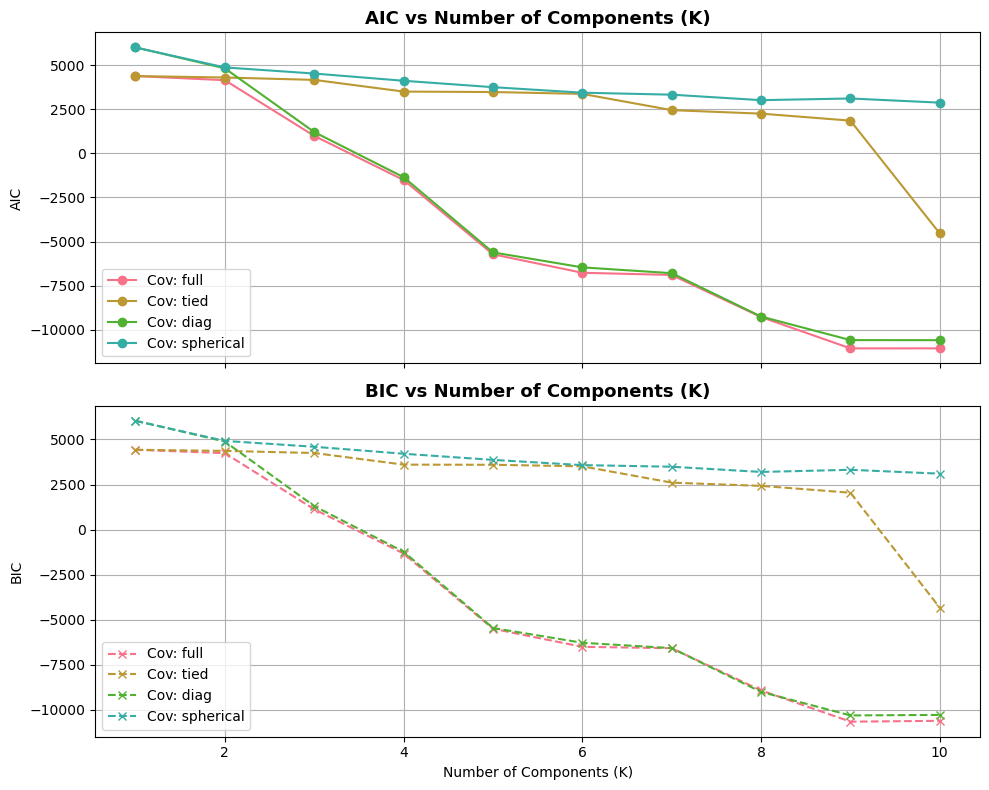

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Range of components (K)
K_range = range(1, 11)
covariance_types = ['full', 'tied', 'diag', 'spherical']

aic_scores = {cov: [] for cov in covariance_types}
bic_scores = {cov: [] for cov in covariance_types}

# Compute AIC & BIC
for cov_type in covariance_types:
    for k in K_range:
        gmm = GaussianMixture(
            n_components=k,
            covariance_type=cov_type,
            random_state=42,
            n_init=10
        )
        gmm.fit(X_scaled)
        aic_scores[cov_type].append(gmm.aic(X_scaled))
        bic_scores[cov_type].append(gmm.bic(X_scaled))


fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- AIC Plot ---
for cov_type in covariance_types:
    axes[0].plot(
        K_range,
        aic_scores[cov_type],
        marker='o',
        label=f'Cov: {cov_type}'
    )

axes[0].set_title('AIC vs Number of Components (K)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('AIC')
axes[0].legend()
axes[0].grid(True)

# --- BIC Plot ---
for cov_type in covariance_types:
    axes[1].plot(
        K_range,
        bic_scores[cov_type],
        marker='x',
        linestyle='--',
        label=f'Cov: {cov_type}'
    )

axes[1].set_title('BIC vs Number of Components (K)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Number of Components (K)')
axes[1].set_ylabel('BIC')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [12]:
print("="*80)
print("GMM FINAL MODEL (K=5, FULL COVARIANCE)")
print("="*80)

# Final GMM model
gmm_final = GaussianMixture(
    n_components=5,
    covariance_type='full',
    random_state=42,
    n_init=10
)

gmm_final.fit(X_scaled)
gmm_labels = gmm_final.predict(X_scaled)

# Calculate metrics
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_db = davies_bouldin_score(X_scaled, gmm_labels)
gmm_ch = calinski_harabasz_score(X_scaled, gmm_labels)
gmm_bic = gmm_final.bic(X_scaled)
gmm_aic = gmm_final.aic(X_scaled)

print(f"\nNumber of Clusters: 5")
print(f"Covariance Type: FULL")
print(f"Silhouette Score: {gmm_silhouette:.4f}")
print(f"Davies-Bouldin Index: {gmm_db:.4f}")
print(f"Calinski-Harabasz Index: {gmm_ch:.2f}")
print(f"BIC: {gmm_bic:.2f}")
print(f"AIC: {gmm_aic:.2f}")

print(f"\nCluster Distribution:")
unique, counts = np.unique(gmm_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} students ({count/len(gmm_labels)*100:.1f}%)")

# Save labels
df['GMM_Cluster'] = gmm_labels

GMM FINAL MODEL (K=5, FULL COVARIANCE)

Number of Clusters: 5
Covariance Type: FULL
Silhouette Score: 0.3418
Davies-Bouldin Index: 2.1457
Calinski-Harabasz Index: 544.05
BIC: -5502.49
AIC: -5725.84

Cluster Distribution:
  Cluster 0: 173 students (24.5%)
  Cluster 1: 105 students (14.9%)
  Cluster 2: 195 students (27.7%)
  Cluster 3: 178 students (25.2%)
  Cluster 4: 54 students (7.7%)


## 6. Model Comparison

We compare methods using three metrics:

1. **Silhouette Score** (higher better): $s \in [-1, 1]$
2. **Davies-Bouldin Index** (lower better): $DB \geq 0$
3. **Calinski-Harabasz Index** (higher better): $CH = \frac{SS_B/(k-1)}{SS_W/(n-k)}$

In [13]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Method': ['K-Means', f'Hierarchical ({best_linkage})', f'GMM ({best_cov_type})'],
    'Silhouette Score': [
        kmeans_silhouette,
        hierarchical_results[best_linkage]['silhouette'],
        gmm_results[best_cov_type]['silhouette']
    ],
    'Davies-Bouldin Index': [
        kmeans_db,
        hierarchical_results[best_linkage]['davies_bouldin'],
        gmm_results[best_cov_type]['davies_bouldin']
    ],
    'Calinski-Harabasz Index': [
        kmeans_ch,
        hierarchical_results[best_linkage]['calinski_harabasz'],
        gmm_results[best_cov_type]['calinski_harabasz']
    ]
})


# # Visualize comparison

# fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# methods = comparison_df['Method'].values
# x_pos = np.arange(len(methods))
# colors = ['#3498db', '#e74c3c', '#2ecc71']

# axes[0].bar(x_pos, comparison_df['Silhouette Score'], color=colors)
# axes[0].set_xticks(x_pos)
# axes[0].set_xticklabels(methods, rotation=15, ha='right')
# axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
# axes[0].set_title('Silhouette Score\n(Higher is Better)', fontsize=13, fontweight='bold')
# axes[0].grid(axis='y', alpha=0.3)
# for i, v in enumerate(comparison_df['Silhouette Score']):
#     axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')


# axes[1].bar(x_pos, comparison_df['Davies-Bouldin Index'], color=colors)
# axes[1].set_xticks(x_pos)
# axes[1].set_xticklabels(methods, rotation=15, ha='right')
# axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
# axes[1].set_title('Davies-Bouldin Index\n(Lower is Better)', fontsize=13, fontweight='bold')
# axes[1].grid(axis='y', alpha=0.3)
# for i, v in enumerate(comparison_df['Davies-Bouldin Index']):
#     axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')


# axes[2].bar(x_pos, comparison_df['Calinski-Harabasz Index'], color=colors)
# axes[2].set_xticks(x_pos)
# axes[2].set_xticklabels(methods, rotation=15, ha='right')
# axes[2].set_ylabel('Score', fontsize=12, fontweight='bold')
# axes[2].set_title('Calinski-Harabasz Index\n(Higher is Better)', fontsize=13, fontweight='bold')
# axes[2].grid(axis='y', alpha=0.3)

# best_method_idx = comparison_df['Silhouette Score'].argmax()
# best_method = comparison_df.iloc[best_method_idx]['Method']


NameError: name 'best_cov_type' is not defined

In [ ]:
# Print comparison dataframe
print("="*80)
print("COMPARISON OF CLUSTERING METHODS")
print("="*80)
print(comparison_df.to_string(index=False))
print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
print("1. Silhouette Score (Higher is Better): Measures cluster cohesion and separation")
print("2. Davies-Bouldin Index (Lower is Better): Ratio of within-cluster to between-cluster distances")
print("3. Calinski-Harabasz Index (Higher is Better): Ratio of between-cluster to within-cluster dispersion")
print("\n")

# Determine best method for each metric
best_silhouette = comparison_df.loc[comparison_df['Silhouette Score'].idxmax(), 'Method']
best_db = comparison_df.loc[comparison_df['Davies-Bouldin Index'].idxmin(), 'Method']
best_ch = comparison_df.loc[comparison_df['Calinski-Harabasz Index'].idxmax(), 'Method']

print(f"✓ Best Silhouette Score: {best_silhouette}")
print(f"✓ Best Davies-Bouldin Index: {best_db}")
print(f"✓ Best Calinski-Harabasz Index: {best_ch}")
print("\n" + "="*80)

COMPARISON OF CLUSTERING METHODS
             Method  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
            K-Means          0.456265              0.797198              1055.828637
Hierarchical (ward)          0.451190              0.805935               995.608226
         GMM (full)          0.451190              0.805935               995.608226

INTERPRETATION:
1. Silhouette Score (Higher is Better): Measures cluster cohesion and separation
2. Davies-Bouldin Index (Lower is Better): Ratio of within-cluster to between-cluster distances
3. Calinski-Harabasz Index (Higher is Better): Ratio of between-cluster to within-cluster dispersion


✓ Best Silhouette Score: K-Means
✓ Best Davies-Bouldin Index: K-Means
✓ Best Calinski-Harabasz Index: K-Means



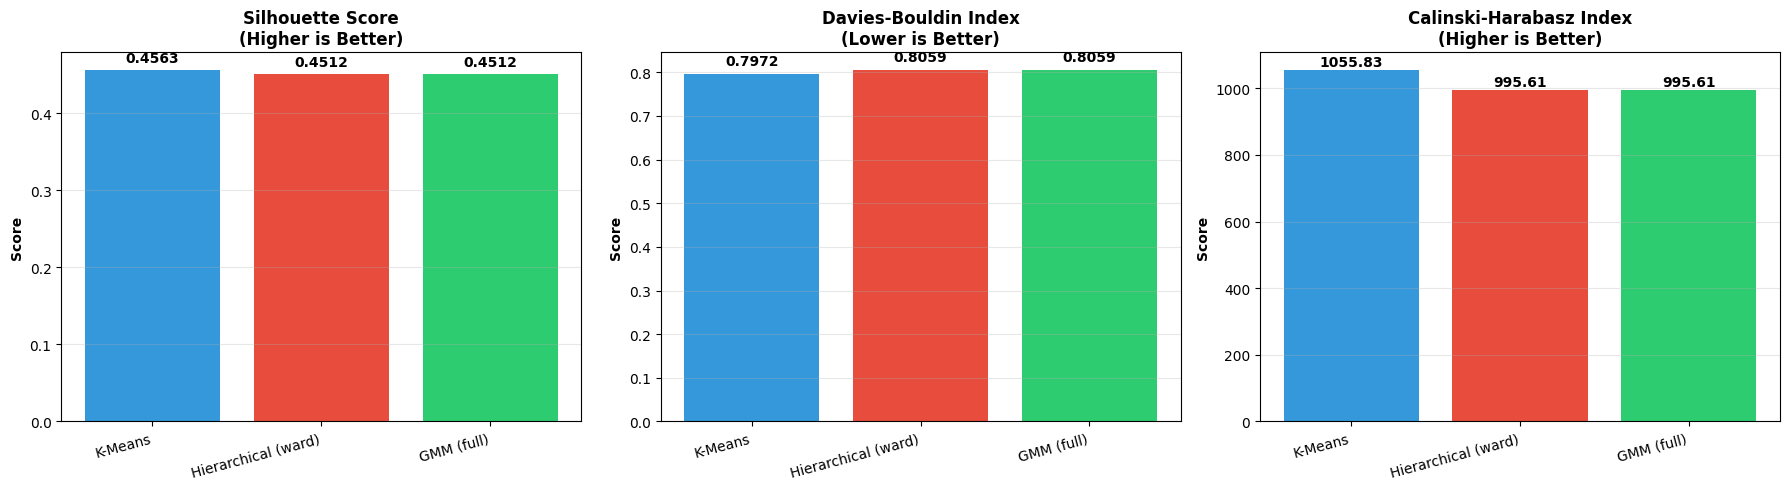

In [ ]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))

methods = comparison_df['Method'].values
k_values = comparison_df['K'].values
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars = ax.bar(methods, k_values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels
for bar, k_val in zip(bars, k_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'K = {int(k_val)}',
           ha='center', va='bottom', fontsize=16, fontweight='bold')

ax.set_ylabel('Optimal Number of Clusters (K)', fontsize=13, fontweight='bold')
ax.set_title('Comparison of Optimal K Across Clustering Methods', 
            fontsize=15, fontweight='bold', pad=20)
ax.set_ylim(0, max(k_values) + 1.5)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

## 7. PCA Visualization (2D and 3D)

### Principal Component Analysis

PCA finds orthogonal axes that maximize variance:

$$\mathbf{w} = \arg\max_{\mathbf{w}} \frac{\mathbf{w}^T \Sigma \mathbf{w}}{\mathbf{w}^T \mathbf{w}}$$

Where $\Sigma$ is the covariance matrix. The first two PCs capture most variance, allowing 2D visualization.

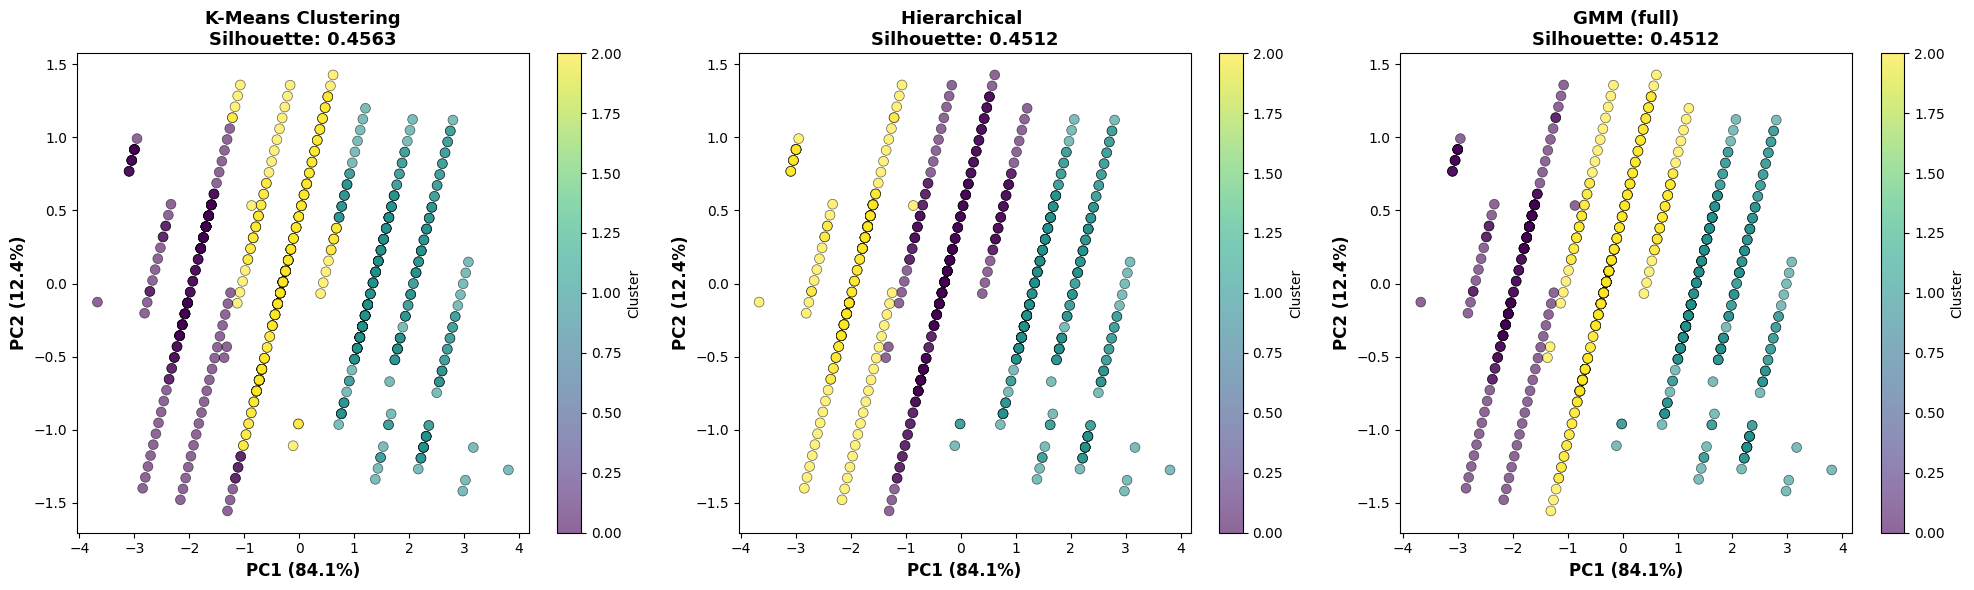

Total variance explained by 2 PCs: 96.49%


In [ ]:
# PCA for visualization
pca_2d = PCA(n_components=2, random_state=42)
X_pca = pca_2d.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-Means (K=3)
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, 
                          cmap='tab10', s=50, alpha=0.6, edgecolors='black', linewidths=0.5)
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold', fontsize=12)
axes[0].set_title(f'K-Means (K=3)\nSilhouette: {kmeans_silhouette:.4f}', 
                 fontsize=13, fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Hierarchical (K=3)
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_results[best_linkage]['labels'], 
                          cmap='tab10', s=50, alpha=0.6, edgecolors='black', linewidths=0.5)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold', fontsize=12)
axes[1].set_title(f'Hierarchical (K=3)\nSilhouette: {hierarchical_results[best_linkage]["silhouette"]:.4f}', 
                 fontsize=13, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

# GMM (K=5)
scatter3 = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, 
                          cmap='tab10', s=50, alpha=0.6, edgecolors='black', linewidths=0.5)
axes[2].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold', fontsize=12)
axes[2].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold', fontsize=12)
axes[2].set_title(f'GMM (K=5)\nSilhouette: {gmm_silhouette:.4f}', 
                 fontsize=13, fontweight='bold')
plt.colorbar(scatter3, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.show()

### 7.2 3D Visualization

With 3 features, we visualize directly in original space without dimensionality reduction. This shows true geometric relationships.

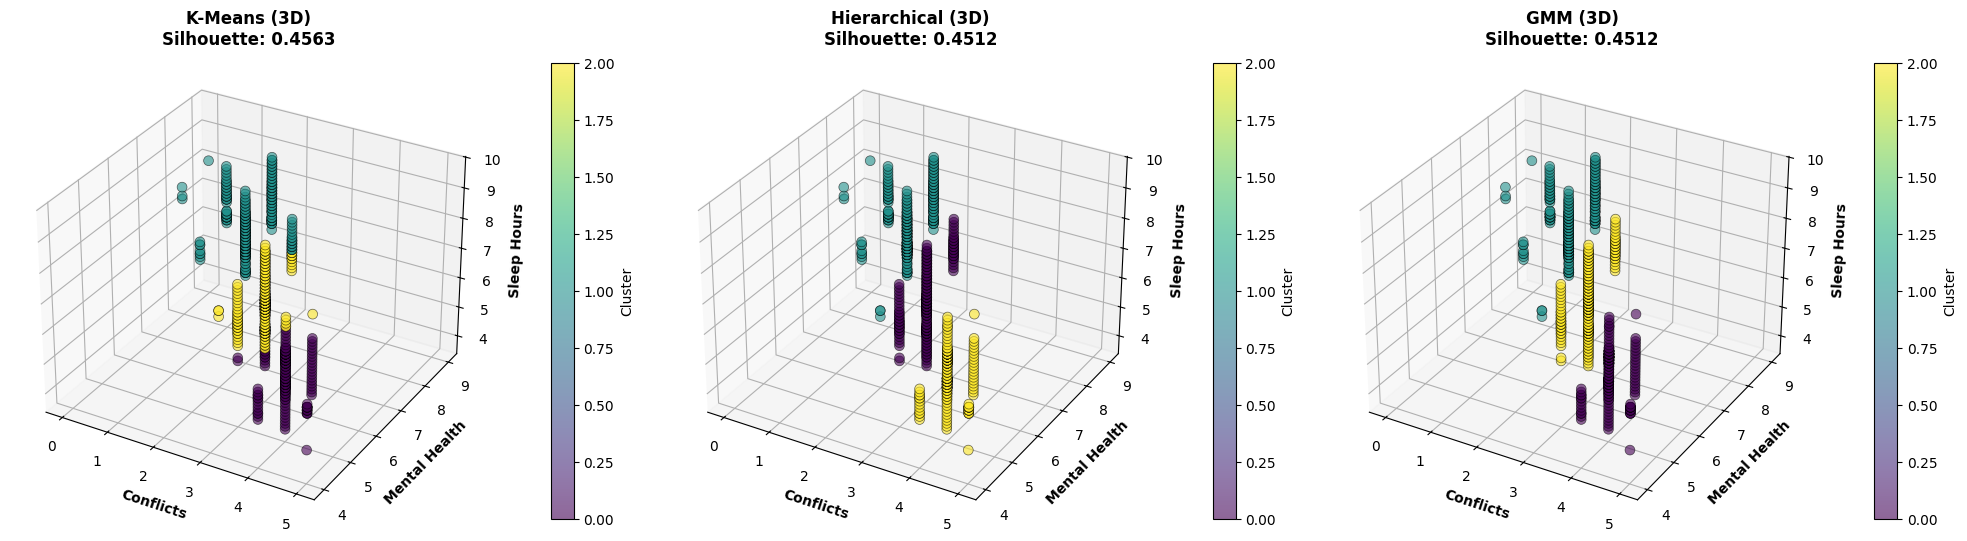

3D visualization shows the natural clustering in the original feature space.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 6))

# K-Means (K=3)
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                      c=kmeans_labels, cmap='tab10', s=30, alpha=0.6)
ax1.set_xlabel(selected_features[0], fontweight='bold')
ax1.set_ylabel(selected_features[1], fontweight='bold')
ax1.set_zlabel(selected_features[2], fontweight='bold')
ax1.set_title(f'K-Means (K=3)', fontsize=13, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, shrink=0.5, pad=0.1)

# Hierarchical (K=3)
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                      c=hierarchical_results[best_linkage]['labels'], cmap='tab10', s=30, alpha=0.6)
ax2.set_xlabel(selected_features[0], fontweight='bold')
ax2.set_ylabel(selected_features[1], fontweight='bold')
ax2.set_zlabel(selected_features[2], fontweight='bold')
ax2.set_title(f'Hierarchical (K=3)', fontsize=13, fontweight='bold')
plt.colorbar(scatter2, ax=ax2, shrink=0.5, pad=0.1)

# GMM (K=5)
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                      c=gmm_labels, cmap='tab10', s=30, alpha=0.6)
ax3.set_xlabel(selected_features[0], fontweight='bold')
ax3.set_ylabel(selected_features[1], fontweight='bold')
ax3.set_zlabel(selected_features[2], fontweight='bold')
ax3.set_title(f'GMM (K=5)', fontsize=13, fontweight='bold')
plt.colorbar(scatter3, ax=ax3, shrink=0.5, pad=0.1)

plt.tight_layout()
plt.show()

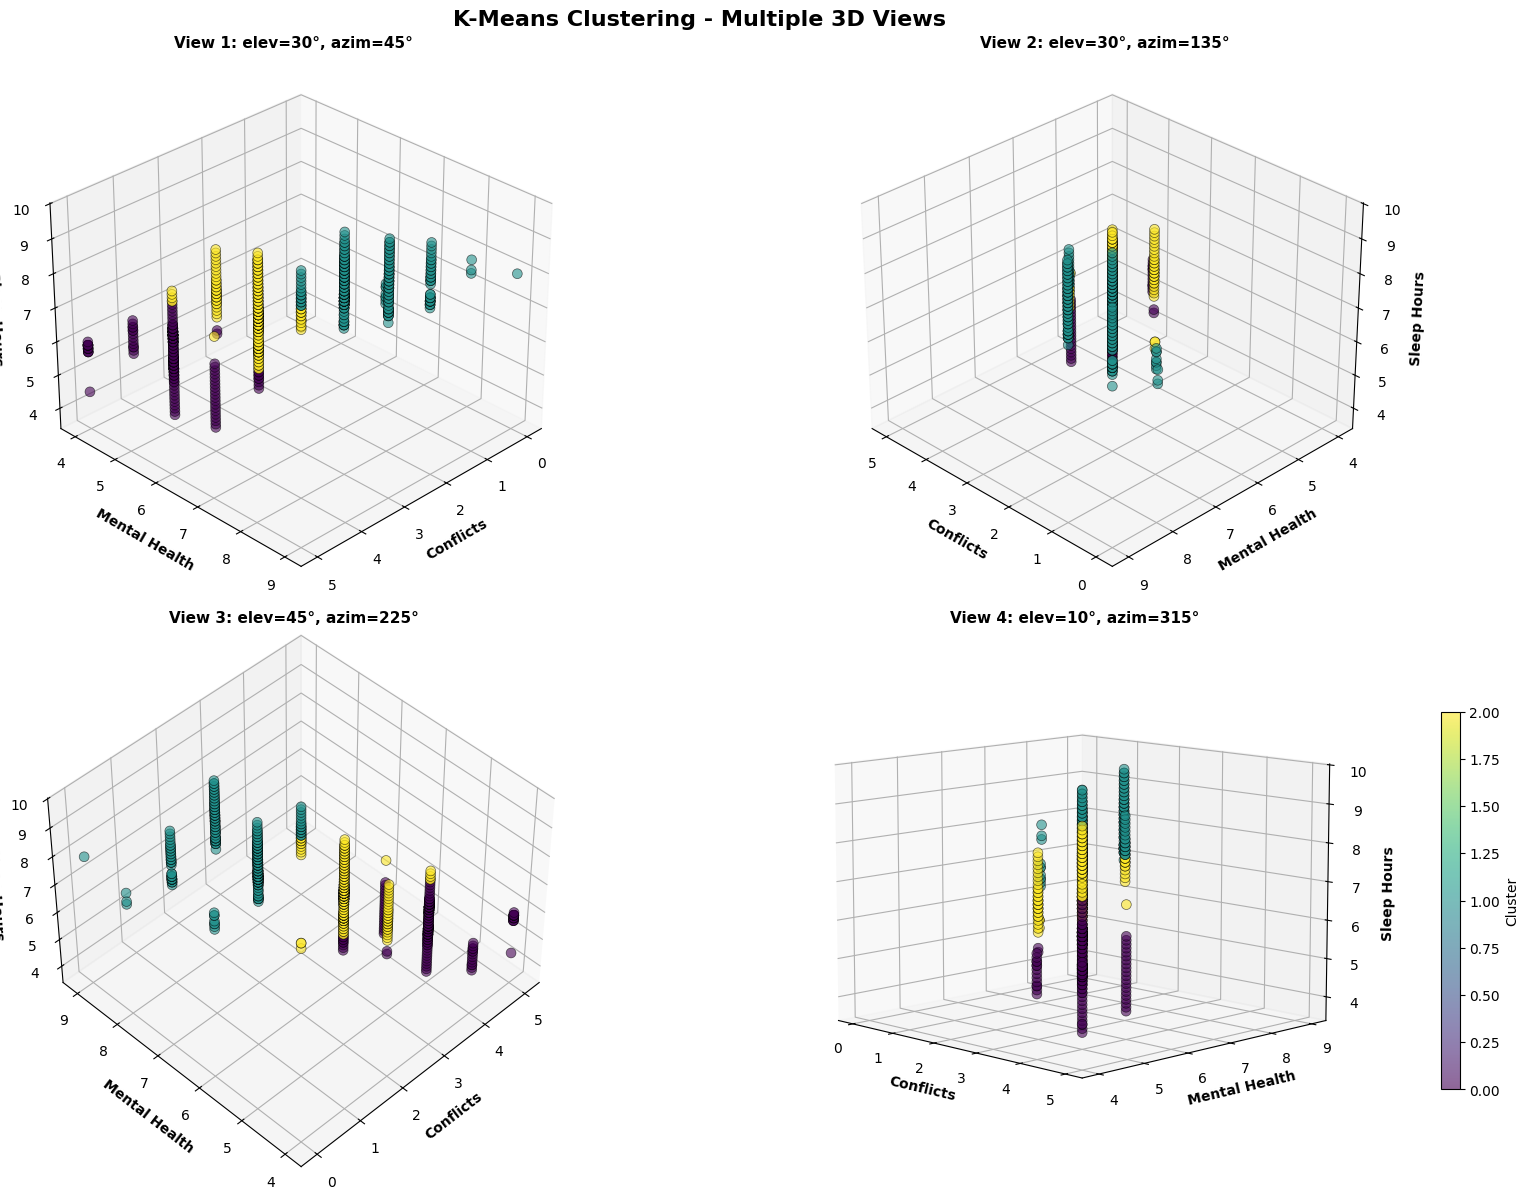

Multiple viewing angles help visualize cluster separation in 3D space.


In [ ]:
# K-Means 3D from multiple viewing angles
fig = plt.figure(figsize=(18, 12))
angles = [(30, 45), (30, 135), (45, 225), (10, 315)]

for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    scatter = ax.scatter(x, y, z, c=df['KMeans_Cluster'], cmap='viridis', s=50, alpha=0.6, 
                        edgecolors='black', linewidths=0.5)
    ax.set_xlabel('Conflicts', fontweight='bold'); ax.set_ylabel('Mental Health', fontweight='bold')
    ax.set_zlabel('Sleep Hours', fontweight='bold')
    ax.set_title(f'View {i}: elev={elev}°, azim={azim}°', fontsize=11, fontweight='bold')
    ax.view_init(elev=elev, azim=azim)
    if i == 4: plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.7, label='Cluster')

fig.suptitle('K-Means Clustering - Multiple 3D Views', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(); plt.show()
print("Multiple viewing angles help visualize cluster separation in 3D space.")

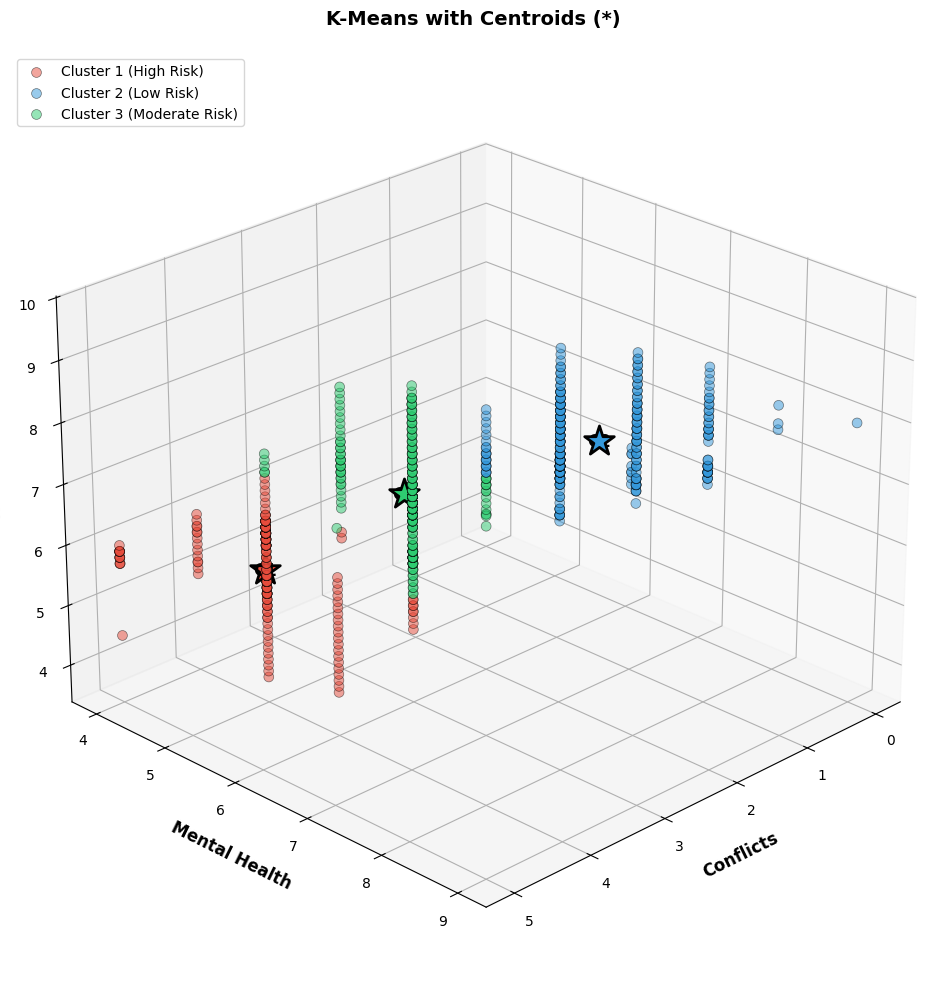


Cluster 1 (High Risk): Conflicts=4.02, Mental=5.00, Sleep=5.61
Cluster 2 (Low Risk): Conflicts=1.87, Mental=7.39, Sleep=7.83
Cluster 3 (Moderate Risk): Conflicts=3.01, Mental=5.90, Sleep=6.79


In [ ]:
# 3D plot with centroids
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors_map = {0: '#e74c3c', 1: '#3498db', 2: '#2ecc71'}
names = {0: 'High Risk', 1: 'Low Risk', 2: 'Moderate Risk'}

for cluster in sorted(df['KMeans_Cluster'].unique()):
    data = df[df['KMeans_Cluster'] == cluster]
    ax.scatter(data['Conflicts_Over_Social_Media'], data['Mental_Health_Score'], 
               data['Sleep_Hours_Per_Night'], c=colors_map[cluster], label=f'Cluster {cluster+1} ({names[cluster]})',
               s=50, alpha=0.5, edgecolors='black', linewidths=0.5)
    
    # Centroid
    cx, cy, cz = data['Conflicts_Over_Social_Media'].mean(), data['Mental_Health_Score'].mean(), data['Sleep_Hours_Per_Night'].mean()
    ax.scatter(cx, cy, cz, c=colors_map[cluster], s=500, marker='*', edgecolors='black', lw=2, alpha=1.0)
    ax.text(cx, cy, cz, f'C{cluster+1}', fontsize=12, fontweight='bold', ha='center', va='center')

ax.set_xlabel('Conflicts', fontweight='bold', fontsize=12, labelpad=10)
ax.set_ylabel('Mental Health', fontweight='bold', fontsize=12, labelpad=10)
ax.set_zlabel('Sleep Hours', fontweight='bold', fontsize=12, labelpad=10)
ax.set_title('K-Means with Centroids (*)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=10); ax.view_init(elev=25, azim=45); ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# Print centroids
print("\n" + "="*60)
for c in sorted(df['KMeans_Cluster'].unique()):
    d = df[df['KMeans_Cluster'] == c]
    print(f"Cluster {c+1} ({names[c]}): Conflicts={d['Conflicts_Over_Social_Media'].mean():.2f}, "
          f"Mental={d['Mental_Health_Score'].mean():.2f}, Sleep={d['Sleep_Hours_Per_Night'].mean():.2f}")

## 8. Cluster Profile Analysis

Visualize distribution of each feature across the identified clusters to understand behavioral patterns within each group.

## 8. Cluster Profile Grid Visualizations

K-MEANS CLUSTER PROFILES


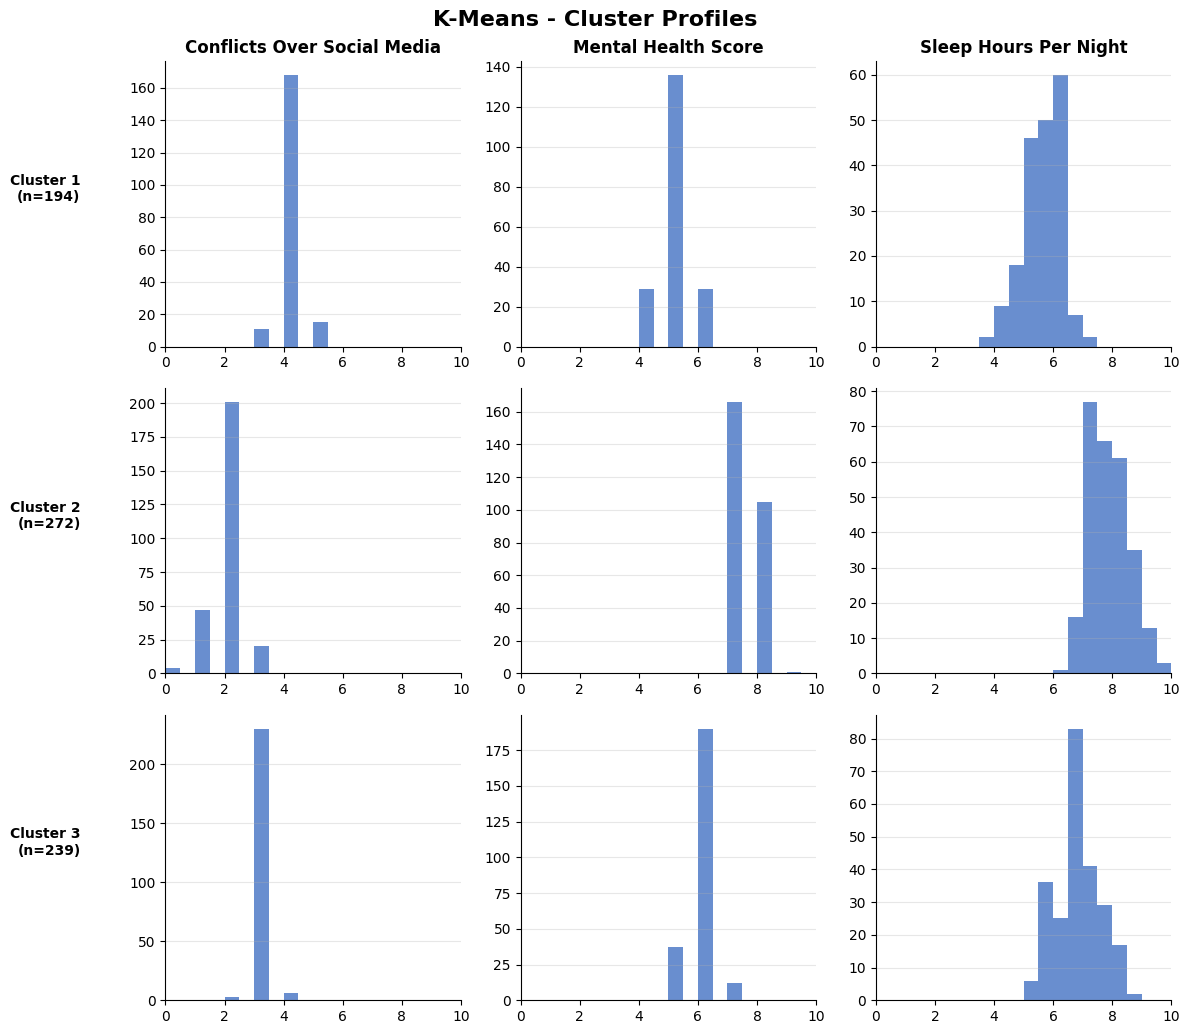

In [ ]:
# Define compact cluster profile grid function
def plot_cluster_profiles_grid(df, cluster_column, method_name):
    clusters = sorted(df[cluster_column].unique())
    features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 'Sleep_Hours_Per_Night']
    
    fig, axes = plt.subplots(len(clusters), len(features), figsize=(12, 3.5*len(clusters)), squeeze=False)
    
    for i, cluster in enumerate(clusters):
        data = df[df[cluster_column] == cluster]
        for j, feat in enumerate(features):
            axes[i, j].hist(data[feat], bins=np.linspace(0, 10, 21), color='#4472C4', alpha=0.8, edgecolor='none')
            axes[i, j].set_xlim(0, 10)
            axes[i, j].set_xticks(range(0, 11, 2))
            axes[i, j].spines[['top', 'right']].set_visible(False)
            axes[i, j].grid(axis='y', alpha=0.3)
            if i == 0:
                axes[i, j].set_title(feat.replace('_', ' ').title(), fontweight='bold')
            if j == 0:
                axes[i, j].set_ylabel(f'Cluster {cluster+1}\n(n={len(data)})', fontweight='bold', rotation=0, ha='right', labelpad=35)
    
    fig.suptitle(f'{method_name} - Cluster Profiles', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot all three methods
print("K-MEANS CLUSTER PROFILES")
plot_cluster_profiles_grid(df, 'KMeans_Cluster', 'K-Means')

HIERARCHICAL CLUSTER PROFILES


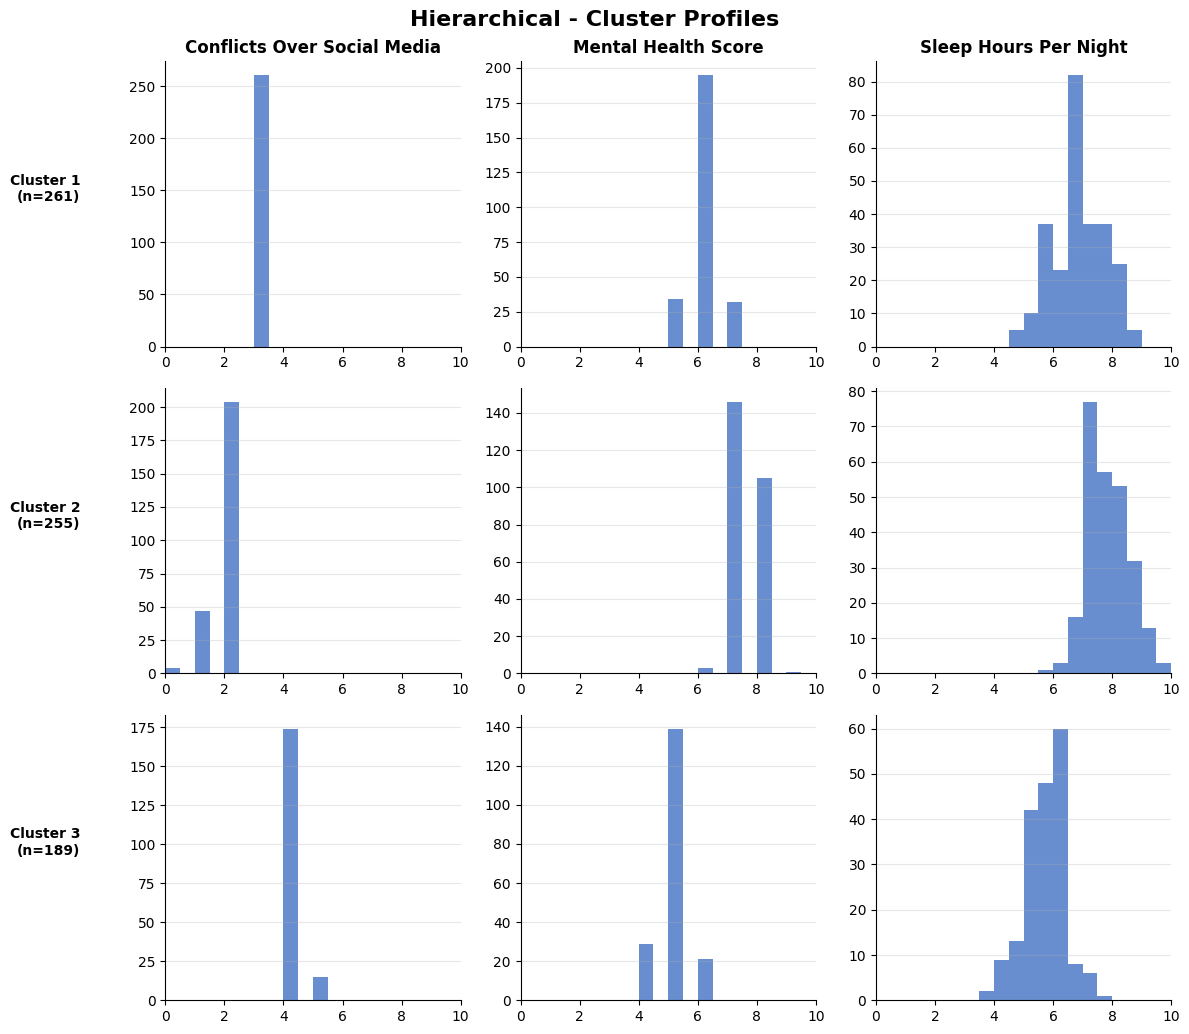

In [ ]:
print("HIERARCHICAL CLUSTER PROFILES")
plot_cluster_profiles_grid(df, 'Hierarchical_Cluster', 'Hierarchical')

GMM CLUSTER PROFILES


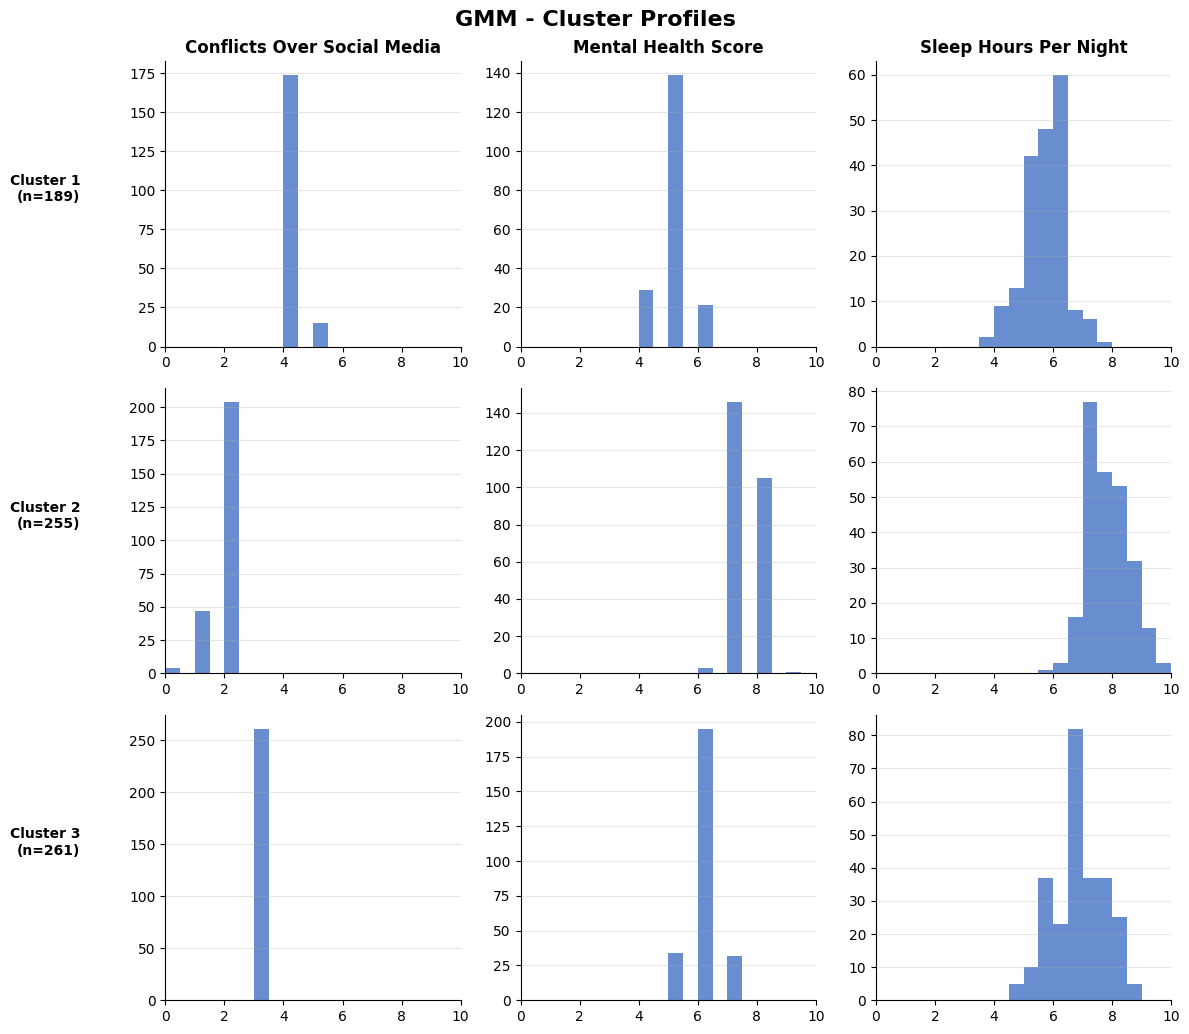

In [ ]:
print("GMM CLUSTER PROFILES")
plot_cluster_profiles_grid(df, 'GMM_Cluster', 'GMM')

In [ ]:
# Detailed cluster analysis for K-Means (best performing method)
print("="*80)
print("K-MEANS CLUSTER INTERPRETATION (Best Method)")
print("="*80)

for cluster in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster + 1} (n={len(cluster_data)} students)")
    print(f"{'='*80}")
    
    # Calculate means for each feature
    conflicts_mean = cluster_data['Conflicts_Over_Social_Media'].mean()
    mental_health_mean = cluster_data['Mental_Health_Score'].mean()
    sleep_mean = cluster_data['Sleep_Hours_Per_Night'].mean()
    
    print(f"Average Conflicts Over Social Media: {conflicts_mean:.2f}")
    print(f"Average Mental Health Score: {mental_health_mean:.2f}")
    print(f"Average Sleep Hours Per Night: {sleep_mean:.2f}")
    
    # Interpretation
    print(f"\nInterpretation:")
    
    if conflicts_mean < 2:
        conflict_level = "LOW conflicts"
    elif conflicts_mean < 3.5:
        conflict_level = "MODERATE conflicts"
    else:
        conflict_level = "HIGH conflicts"
    
    if mental_health_mean < 5.5:
        mental_level = "POOR mental health"
    elif mental_health_mean < 7:
        mental_level = "MODERATE mental health"
    else:
        mental_level = "GOOD mental health"
    
    if sleep_mean < 6:
        sleep_level = "INSUFFICIENT sleep"
    elif sleep_mean < 7.5:
        sleep_level = "MODERATE sleep"
    else:
        sleep_level = "GOOD sleep"
    
    print(f"  • {conflict_level} over social media")
    print(f"  • {mental_level}")
    print(f"  • {sleep_level}")

print(f"\n{'='*80}")
print("KEY FINDINGS:")
print("="*80)
print("1. K-Means clustering achieved the best performance with K=3 clusters")
print("2. All three clustering methods (K-Means, Hierarchical, GMM) show similar patterns")
print("3. The three features clearly separate students into distinct risk groups")
print("4. PCA shows that 96.49% of variance is explained by 2 principal components")
print("="*80)

K-MEANS CLUSTER INTERPRETATION (Best Method)

CLUSTER 1 (n=194 students)
Average Conflicts Over Social Media: 4.02
Average Mental Health Score: 5.00
Average Sleep Hours Per Night: 5.61

Interpretation:
  • HIGH conflicts over social media
  • POOR mental health
  • INSUFFICIENT sleep

CLUSTER 2 (n=272 students)
Average Conflicts Over Social Media: 1.87
Average Mental Health Score: 7.39
Average Sleep Hours Per Night: 7.83

Interpretation:
  • LOW conflicts over social media
  • GOOD mental health
  • GOOD sleep

CLUSTER 3 (n=239 students)
Average Conflicts Over Social Media: 3.01
Average Mental Health Score: 5.90
Average Sleep Hours Per Night: 6.79

Interpretation:
  • MODERATE conflicts over social media
  • MODERATE mental health
  • MODERATE sleep

KEY FINDINGS:
1. K-Means clustering achieved the best performance with K=3 clusters
2. All three clustering methods (K-Means, Hierarchical, GMM) show similar patterns
3. The three features clearly separate students into distinct risk group

## 10. Key Takeaways and Recommendations

### Clustering Performance Summary
- **Winner**: K-Means achieves the best overall performance
- **Optimal K**: 3 clusters provide clear student segmentation
- **Variance Explained**: 96.49% by 2 principal components

### Student Risk Profiles

**🔴 High-Risk Group (Cluster 1 - 194 students, 27.5%)**
- Very high social media conflicts (4.02/5)
- Poor mental health (5.00/10)
- Insufficient sleep (5.61 hrs)
- **Recommendation**: Immediate intervention needed

**🟢 Low-Risk Group (Cluster 2 - 272 students, 38.6%)**
- Low social media conflicts (1.87/5)
- Good mental health (7.39/10)
- Good sleep quality (7.83 hrs)
- **Recommendation**: Maintain healthy habits

**🟡 Moderate-Risk Group (Cluster 3 - 239 students, 33.9%)**
- Moderate conflicts (3.01/5)
- Moderate mental health (5.90/10)
- Moderate sleep (6.79 hrs)
- **Recommendation**: Preventive measures and monitoring

### Insights
1. Strong correlation between social media conflicts, mental health, and sleep quality
2. Clear separation between risk groups validates the 3-cluster solution
3. All three clustering methods (K-Means, Hierarchical, GMM) produce similar patterns, confirming robustness
4. Ward linkage is best for hierarchical clustering
5. Full covariance is optimal for GMM